> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This Dataset is No show appointments in may 2016 from kaggle
It is divided into 14 columns  
1) PatientId => is The ID of the patient  
2) AppointmentID => is the ID of the appointment  
3) Gender => Indicates the Gender of patient  
4) ScheduledDay => Indicates the day the patient scheduled an appointment   
5) AppointmentDay => Indicates the day of the appointment  
6) Age => Indicates the Age of the patient  
7) Neighbourhood => Indicates the neighborhoud in which the hospital is located  
8) Scholarship => indicates wheteher a patient has a scholarship or not  
9) Hipertension => Indicates having or not having hipertension disease  
10) Diabetes => indicates having diabetes or not  
11) Alcholism => Indicates being an alcoholic or not  
12) Handcap => indicates being handicapped and have 5 values [0,4]  
13) SMS_received => indicates if the patient had an SMS reminder for appointment  
14) No-show => indicates showing or not showing to the scheduled appointment  
  
  

info from => https://www.kaggle.com/wbadry/noshow-appointment-may-2016


### Question(s) for Analysis
1) My dependent variable that I will try to analyze is the No-show column
2) My independent variables that I will use are (Age,Gender,SMS_received,ScheduledDay , AppointmentDay)
3) Will try to conclude how each factor of these affect the probability of a patient showing up

# How does age affect the probability of a patient showing up ?

# Is Gender an affecting variable in a patient showing up ?

# Does being notified by an SMS increase your probability of showing up ?

# Is having an early or late scheduled appointment affect if you're attending it ?

In [35]:
#importing used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [ ]:
def unique_val(dictionary , columnname ,df):
    dictionary[columnname] = df[columnname].unique()
    return dictionary


<a id='wrangling'></a>
## Data Wrangling
> 1) I loaded the data in df then printed a header to have an overview of the data  
2) then printed out the dataframe shape to determine the number of rows and columns  
3) then printed all the datatypes of the columns to know what to alter  
  
# Data Cleaning

> 1) Turned PatientID into integer64 datatype  
 2) Turned Gender into a numerical binary (0 , 1) instead of Character binary (F , M)  
 3) Changed ScheduledDay and AppointmentDay into a datetime object facilitate analysis  
 4) Handled unrealistic ages and replaced them with the average of ages  
 5) Created a new column "Wait_Period" which is the difference between ScheduledDay and AppointmentDay  
   
 idea inspired in point 5 by :  
 https://www.kaggle.com/jilkothari/exploratory-data-analysis-medical-appointments


In [37]:
#loading dataset
fname = "Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv"
df = pd.read_csv(fname)

In [38]:
#have an overview and print a header
print(df.head(5))

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [39]:
#know the number of rows and columns of the table
rows = df.shape[0]
columns = df.shape[1]
print(f"The number of rows is {rows} , The number of columns is {columns}")

The number of rows is 110527 , The number of columns is 14


# Checking for nulls
> Will check for nulls and handle them if found

In [40]:
nulls = df.isnull().sum()
nulls

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> No Nulls were found

# Checking for duplicates
> Will Check for duplicates and handle them if found

In [41]:
duplicates = sum(df.duplicated())
duplicates

0

> No Duplicates were found

In [42]:
#figure out the datatype of the table
print(df.dtypes)

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


# PatientID 
> PatientId is float64 type and should be integer datatype  

In [43]:
df["PatientId"] = df["PatientId"].astype('int64')
print(df["PatientId"].dtype)

int64


# Gender
> Gender is shown as a string of F for female and M for Male and I want it as binary  
0 for Female and 1 For male  


In [44]:
df["Gender"] = df["Gender"].replace(to_replace='F',value= 0)
df["Gender"] = df["Gender"].replace(to_replace='M' , value= 1)

# Appointment Day and Scheduled Day
> AppointmentDay and Scheduled day are of type string 
and I want them in np.datetime64 format to be easier to work with  

In [45]:
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df.ScheduledDay = df.ScheduledDay.apply(np.datetime64)
print(df["ScheduledDay"].dtype)
print(df["AppointmentDay"].dtype)

datetime64[ns]
datetime64[ns]


# Age has some unrealistic values 
> Age less than 0 and greater than 100 will be considered unrealistic  
thus I will replace them with the age average  


In [46]:
unrealistic_ages = 0
less_than_zero_ages = df[df["Age"] < 0]
unrealistic_ages = unrealistic_ages + less_than_zero_ages.shape[0]
more_than_100_ages = df[df["Age"] > 100]
unrealistic_ages = unrealistic_ages + more_than_100_ages.shape[0]
average_of_ages = int(df["Age"].mean())

for i in less_than_zero_ages.index:
    #print(df.loc[i,"Age"])
    df.loc[i,"Age"] = average_of_ages
    #print(df.loc[i])
for i in more_than_100_ages.index:
    #print(df.loc[i,"Age"])
    df.loc[i,"Age"] = average_of_ages
    #print(df.loc[i])

print(f"The number of altered unrealistic ages are {unrealistic_ages} \nThe average of ages changed to is {average_of_ages}")

The number of altered unrealistic ages are 8 
The average of ages changed to is 37


# No-Show
> No-show is represented in binary answers ("Yes","No") and I want them in numerical binary values  
1 for Yes and 0 for No

In [47]:
df["No-show"] = df["No-show"].replace(to_replace= 'Yes' , value = 1)
df["No-show"] = df["No-show"].replace(to_replace= 'No' , value = 0)

In [70]:
value_for_headers = dict()
headers = df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Wait_Period'],
      dtype='object')

> storing all unique values for each header for overview i

In [71]:
for header in headers:
    value_for_headers = unique_val(value_for_headers,header,df)

{'PatientId': array([ 29872499824296, 558997776694438,   4262962299951, ...,
         72633149253362, 996997666245785,  15576631729893]),
 'AppointmentID': array([5642903, 5642503, 5642549, ..., 5630692, 5630323, 5629448]),
 'Gender': array([0, 1]),
 'ScheduledDay': array(['2016-04-29T18:38:08.000000000', '2016-04-29T16:08:27.000000000',
        '2016-04-29T16:19:04.000000000', ...,
        '2016-04-27T16:03:52.000000000', '2016-04-27T15:09:23.000000000',
        '2016-04-27T13:30:56.000000000'], dtype='datetime64[ns]'),
 'AppointmentDay': array(['2016-04-29T00:00:00.000000000', '2016-05-03T00:00:00.000000000',
        '2016-05-10T00:00:00.000000000', '2016-05-17T00:00:00.000000000',
        '2016-05-24T00:00:00.000000000', '2016-05-31T00:00:00.000000000',
        '2016-05-02T00:00:00.000000000', '2016-05-30T00:00:00.000000000',
        '2016-05-16T00:00:00.000000000', '2016-05-04T00:00:00.000000000',
        '2016-05-19T00:00:00.000000000', '2016-05-12T00:00:00.000000000',
        '20

# Creating Useful dataframes to guide my analysis Through My Investigation

# Simple Statistics for Gender

In [48]:
n_males = df["Gender"].sum()
n_males_percentage = ((n_males/rows)*100)
n_females = rows - n_males
n_females_percentage = ((n_females/rows)*100)

# People That Showed Up

In [49]:
showed_up = df[df["No-show"] == 0]
n_showed_up = df[df["No-show"] == 0].shape[0]
n_showed_up_percentage = ((n_showed_up/rows)*100)

# People That didn't show up

In [50]:
didnt_show_up = df[df["No-show"] == 1]
n_didnt_show_up = df[df["No-show"] == 1].shape[0]
n_didnt_show_up_percentage = ((n_didnt_show_up/rows)*100)

#  Showing up and Not , according to males

In [51]:
males_showed_up = showed_up[showed_up['Gender'] == 1]
n_males_showed_up = males_showed_up.shape[0]
males_didnt_show_up = didnt_show_up[didnt_show_up['Gender'] == 1]
n_males_didnt_show_up = males_didnt_show_up.shape[0]
males_showed_up_percentage = ((n_males_showed_up/n_males)*100)
males_didnt_show_up_percentage = ((n_males_didnt_show_up/n_males)*100)

# Showing up or not , according to females

In [52]:
females_showed_up = showed_up[showed_up['Gender'] == 0]
n_females_showed_up = females_showed_up.shape[0]

females_didnt_show_up = didnt_show_up[didnt_show_up['Gender'] == 0]
n_females_didnt_show_up = females_didnt_show_up.shape[0]

females_showed_up_percentage = ((n_females_showed_up/n_females)*100)
females_didnt_show_up_percentage = ((n_females_didnt_show_up/n_females)*100)

# Showing Up or not , according To receiving an SMS

In [53]:
showed_up_received_SMS = showed_up[showed_up['SMS_received'] == 1] #received SMS
n_showed_up_received_SMS = showed_up_received_SMS.shape[0]#number of people who showed up and received SMS
showed_up_didnt_receive_SMS = showed_up[showed_up['SMS_received'] == 0] #didnt receive SMS
n_showed_up_didnt_receive_SMS = showed_up_didnt_receive_SMS.shape[0]#number of people who showed up and didn't receive SMS


# Showing Up or not , according To NOT receiving an SMS

In [54]:
didnt_show_up_received_SMS = didnt_show_up[didnt_show_up['SMS_received'] == 1] #received SMS
n_didnt_show_up_received_SMS = didnt_show_up_received_SMS.shape[0] #number of people who didn't show up and received SMS
didnt_show_up_didnt_receive_SMS = didnt_show_up[didnt_show_up['SMS_received'] == 0] #didnt receive SMS
n_didnt_show_up_didnt_receive_SMS = didnt_show_up_didnt_receive_SMS.shape[0] #number of people who didn't show up and didn't receive SMS

# Percentages according to SMS

In [55]:
received_SMS_showed_up_percentage = ((n_showed_up_received_SMS/(n_showed_up_received_SMS+n_didnt_show_up_received_SMS))*100)
received_SMS_didnt_show_up_percentage = ((n_didnt_show_up_received_SMS/(n_showed_up_received_SMS+ n_didnt_show_up_received_SMS))*100)
didnt_receive_SMS_showed_up_percentage = ((n_showed_up_didnt_receive_SMS/(n_showed_up_didnt_receive_SMS+n_didnt_show_up_didnt_receive_SMS))*100)
didnt_receive_SMS_didnt_show_up_percentage = ((n_didnt_show_up_didnt_receive_SMS/(n_showed_up_didnt_receive_SMS+ n_didnt_show_up_didnt_receive_SMS))*100)

In [56]:
print("Hello")

Hello


# Wait_Period
> The wait period column is user created which is the difference between the Appointment day and scheduled day  
inspired by a code analysis on :   https://www.kaggle.com/jilkothari/exploratory-data-analysis-medical-appointments

In [57]:
df['Wait_Period'] = (df["AppointmentDay"].dt.date - df["ScheduledDay"].dt.date).dt.days
df= df[(df["Wait_Period"] >= 0)]

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (# How does age affect the probability of a patient showing up ?!)

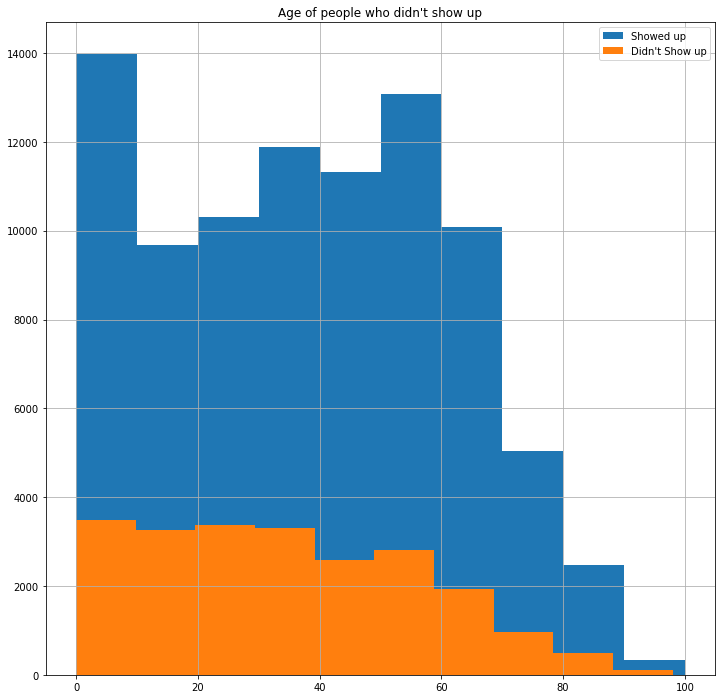

In [58]:
plt.rcParams["figure.figsize"] = (12,12)
Age_showed_up = showed_up["Age"].hist(bins=10).set_title("Age of people who showed up")
Age_didnt_show_up = didnt_show_up["Age"].hist(bins=10).set_title("Age of people who didn't show up")
plt.legend(["Showed up","Didn't Show up"])

>  
The biggest age group attending appointments are in the range of [0,20] years 
old but are also the highest age group missing , and [20,40] and [40,60] age 
groups have near attending numbers then the numbers start to decline as age 
gets over 60 , thus by reaching retirement age , probably they won’t schedule 
or attend an appointment  

There is no relation between attending and missing the appointment with age

### Research Question 2  (Is Gender an affecting variable in a patient showing up ?)

# Basic Conclusions Related to Gender

In [59]:
print(f"The numbers of Males in the study is {n_males} making a percentage of {n_males_percentage.__format__('.1f')} %\nThe number of females in the study is {n_females} making a percentage of {n_females_percentage.__format__('.1f')} %\nThe number of males that showed up to the appointment is {n_males_showed_up} making a percentage of {males_showed_up_percentage.__format__('.1f')}%  from all men supposed to go\nThe number of men that didn't show up to the appointment is {n_males_didnt_show_up} making a percentage of {males_didnt_show_up_percentage.__format__('.1f')}%  from all men supposed to go\nThe number of females that showed up to the appointment is {n_females_showed_up} making a percentage of {females_showed_up_percentage.__format__('.1f')}%  from all women supposed to go\nThe number of women that didn't show up to the appointment is {n_females_didnt_show_up}%  making a percentage of {females_didnt_show_up_percentage.__format__('.1f')}%  from all women supposed to go\n")

The numbers of Males in the study is 38687 making a percentage of 35.0 %
The number of females in the study is 71840 making a percentage of 65.0 %
The number of males that showed up to the appointment is 30962 making a percentage of 80.0%  from all men supposed to go
The number of men that didn't show up to the appointment is 7725 making a percentage of 20.0%  from all men supposed to go
The number of females that showed up to the appointment is 57246 making a percentage of 79.7%  from all women supposed to go
The number of women that didn't show up to the appointment is 14594%  making a percentage of 20.3%  from all women supposed to go



# "Bar Chart Representing Number of Males and Females in The Study"

Text(0.5,1,'Number of Patients according to Gender')

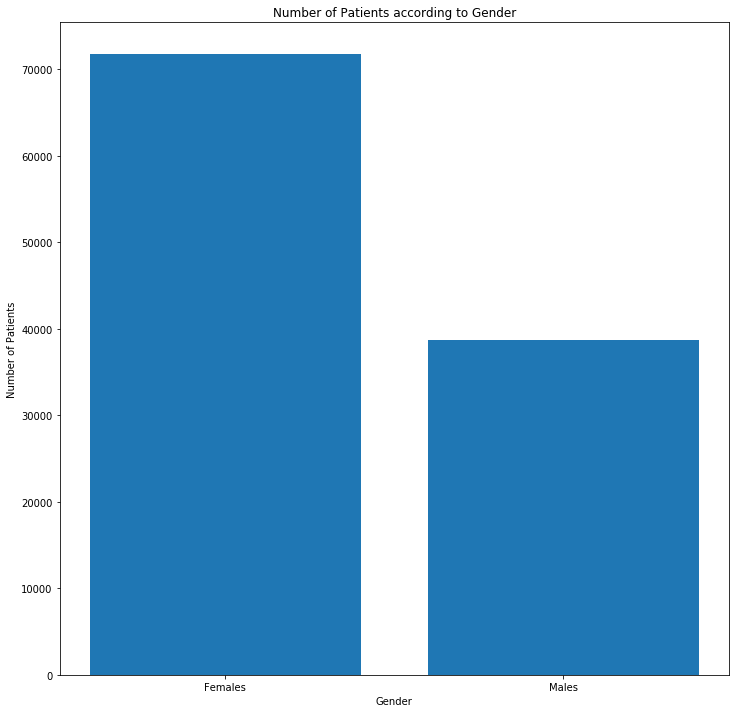

In [60]:
bar_labels = ["Males" , "Females"]
bar_values = [n_males , n_females]
plt.bar(bar_labels , bar_values)
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.title("Number of Patients according to Gender")

# Pie Chart Representing how each gender affected the No-show variable

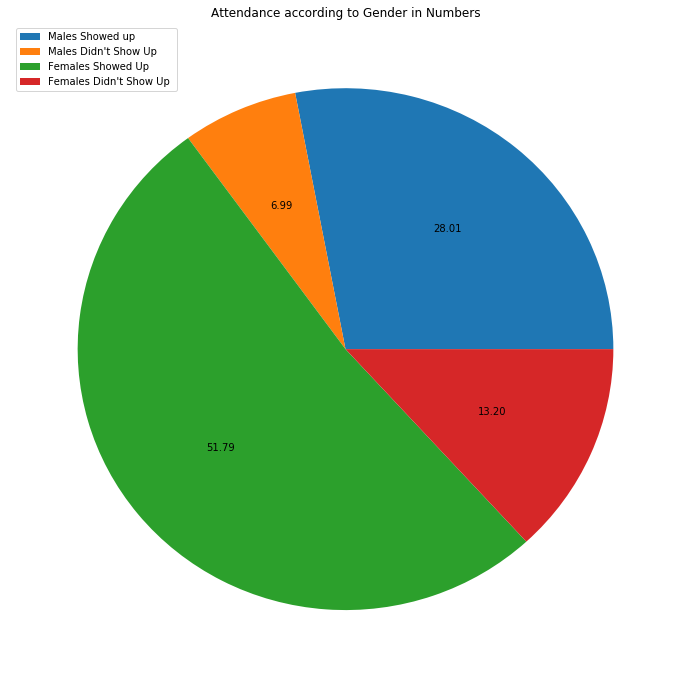

In [61]:
pie_chart_variables = ["Males Showed up  ","Males Didn't Show Up  " , "Females Showed Up  ","Females Didn't Show Up "]
pie_chart_values = [n_males_showed_up,n_males_didnt_show_up,n_females_showed_up,n_females_didnt_show_up]
pie_chart = plt.pie(pie_chart_values,autopct="%.2f")
plt.title("Attendance according to Gender in Numbers")
plt.legend(labels=pie_chart_variables)
plt.show(block=True)

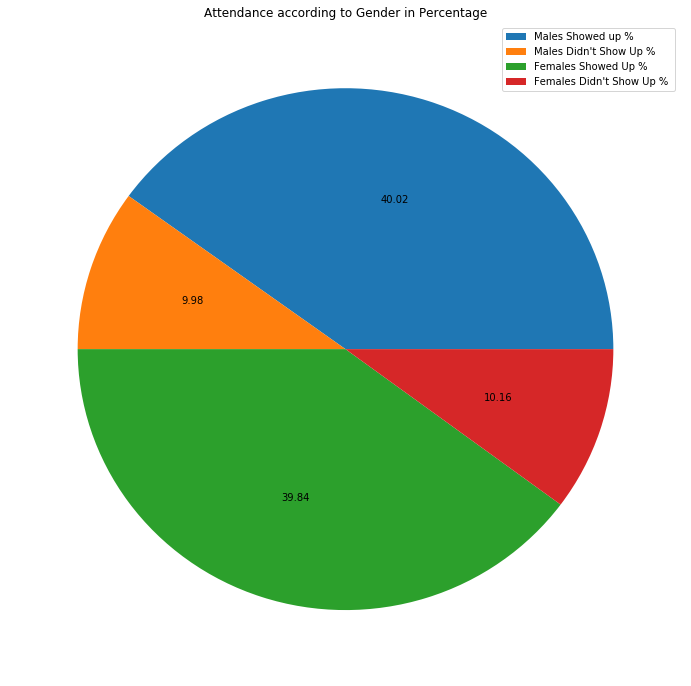

In [62]:
pie_chart_variables = ["Males Showed up %  ","Males Didn't Show Up %  " , "Females Showed Up % ","Females Didn't Show Up % "]
pie_chart_values = [males_showed_up_percentage,males_didnt_show_up_percentage,females_showed_up_percentage,females_didnt_show_up_percentage]
pie_chart = plt.pie(pie_chart_values,autopct="%.2f")
plt.title("Attendance according to Gender in Percentage")
plt.legend(labels=pie_chart_variables)
plt.show(block=True)

> Both genders have almost the same percentage of showing and not showing but according to numbers females are more than males so they have a higher impact numerically but after all , it appears that the gender doesn't affect showing up

### Research Question 3 (Does being notified by an SMS increase your probability of showing up ?)

# SMS_Received with respect to showing up to an appoitnment

> Basic info according to receiving an SMS

In [63]:
n_received_SMS = df[df['SMS_received'] == 1].shape[0] # number of people who received SMS
n_didnt_receive_SMS = df[df['SMS_received'] == 0].shape[0] # number of people who didn't receive SMS
print(f"The number of people who received SMS is {n_received_SMS} making a percentage of {((n_received_SMS/rows)*100).__format__('.1f')} %\nThe number of people who didn't receive SMS is {n_didnt_receive_SMS} making a percentage of {((n_didnt_receive_SMS/rows)*100).__format__('.1f')} %")


The number of people who received SMS is 35482 making a percentage of 32.1 %
The number of people who didn't receive SMS is 75040 making a percentage of 67.9 %


> The number of people that received an SMS is less than the number of people that didn't receive an SMS by more than the double

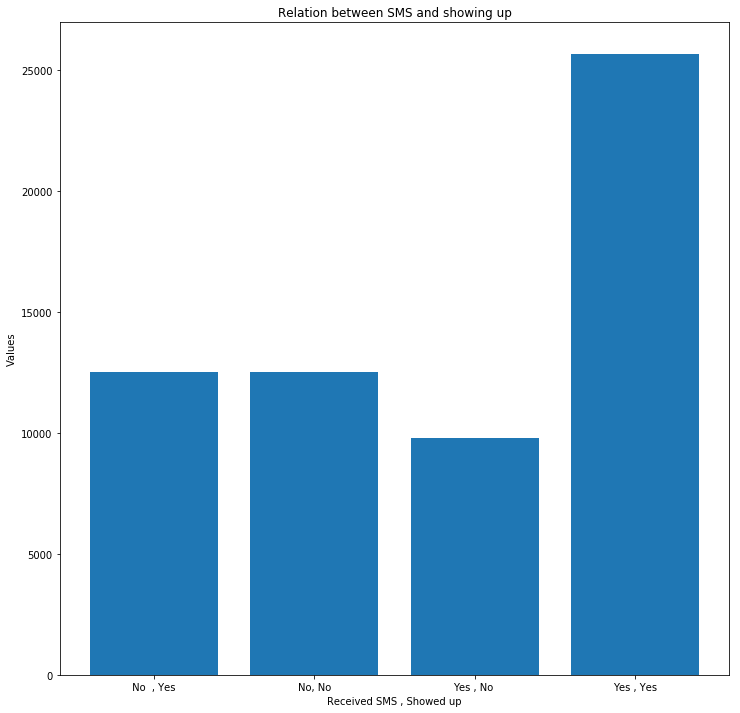

The number of people that received the SMS and showed up is 25698 making a percent of 72.4 %  from the people that received The SMS 
The number of people that received the SMS and didn't show up was 9784 making a percent of 27.6 %  from the people that received the SMS
The number of people that didn't receive an SMS and showed up is 62510 making a percentage of 83.3 %  from all the people that didn't receive an SMS
The number of people that didn't receive an SMS and didn't show up is 12535 making a percentage of 16.7 %  from all people that didn't receive an SMS
 


In [64]:
values_labels = ["Yes , Yes" , "Yes , No " , " No  , Yes " , "No, No"]
values_numeric = [n_showed_up_received_SMS,n_didnt_show_up_received_SMS,n_didnt_show_up_didnt_receive_SMS,n_didnt_show_up_didnt_receive_SMS]
plt.bar(values_labels,values_numeric)
plt.xlabel("Received SMS , Showed up")
plt.ylabel("Values")
plt.title("Relation between SMS and showing up")
plt.show(block=True)

stat1 = received_SMS_showed_up_percentage.__format__('.1f')
stat2 = received_SMS_didnt_show_up_percentage.__format__('.1f')
stat3 = didnt_receive_SMS_showed_up_percentage.__format__('.1f')
stat4 = didnt_receive_SMS_didnt_show_up_percentage.__format__('.1f')

message = "The number of people that received the SMS and showed up is {} making a percent of {} %  from the people that received The SMS \nThe number of people that received the SMS and didn't show up was {} making a percent of {} %  from the people that received the SMS\nThe number of people that didn't receive an SMS and showed up is {} making a percentage of {} %  from all the people that didn't receive an SMS\nThe number of people that didn't receive an SMS and didn't show up is {} making a percentage of {} %  from all people that didn't receive an SMS\n ".format(n_showed_up_received_SMS,stat1,n_didnt_show_up_received_SMS,stat2,n_showed_up_didnt_receive_SMS,stat3,n_didnt_show_up_didnt_receive_SMS,stat4)
print(message)

# Pie Chart for each category to see visualize the differences

## For receiving an SMS

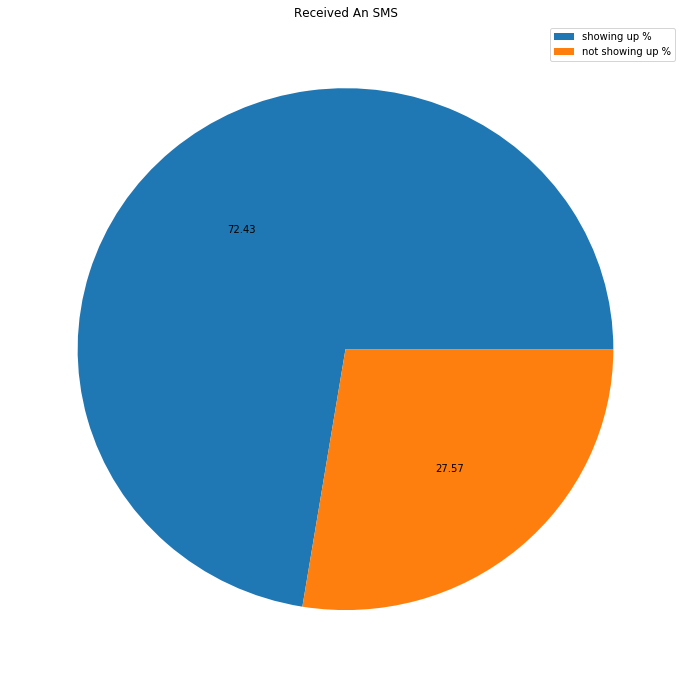

In [65]:
pie_var = ["showing up %" , "not showing up %"]
pie_val = [received_SMS_showed_up_percentage,received_SMS_didnt_show_up_percentage]
plt.pie(pie_val , autopct="%.2f")
plt.title("Received An SMS")
plt.legend(labels = pie_var)

## For Not Receiving an SMS

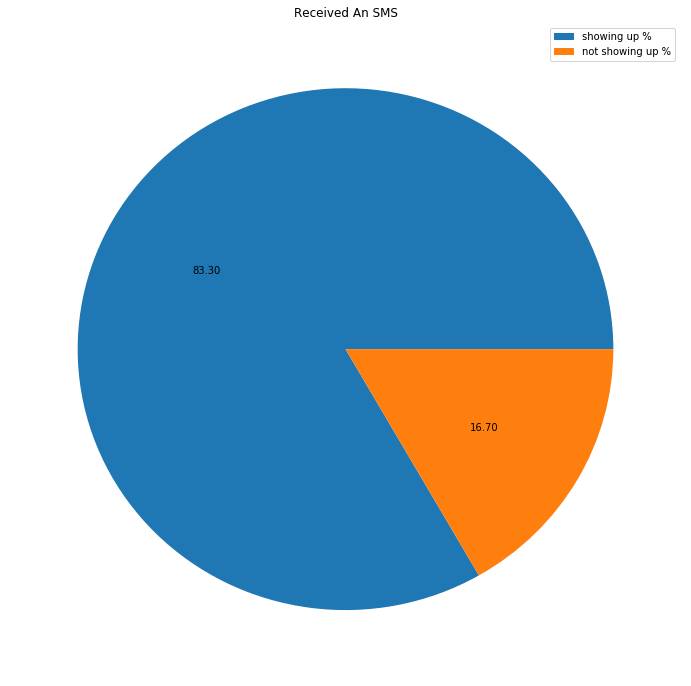

In [66]:
pie_val = [didnt_receive_SMS_showed_up_percentage,didnt_receive_SMS_didnt_show_up_percentage]
plt.pie(pie_val , autopct="%.2f")
plt.title("Received An SMS")
plt.legend(labels = pie_var)

 > The percentage of people receiving an SMS and not showing up is greater than the percent of people that didn't receive an SMS and didn't show up indicating that the people receiving notification SMS is more likely to miss their appointment

### Research Question 4 (Is having an early or late scheduled appointment affect if you're attending it ?)

Text(0,0.5,'Number of people')

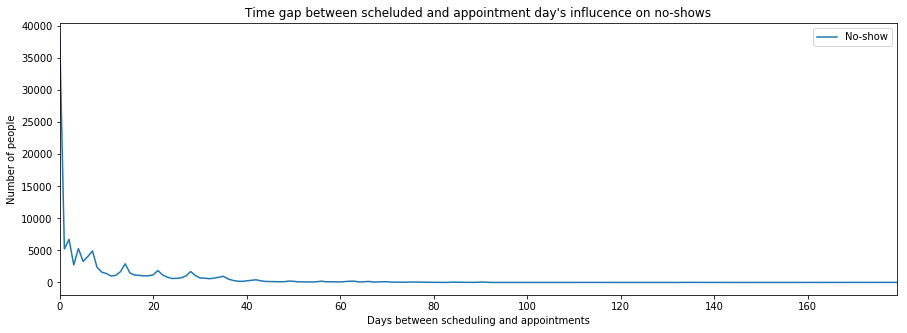

In [67]:
Waiting_df = df[['No-show', 'Wait_Period']].groupby('Wait_Period').count()
Waiting_df.plot(kind='line', figsize=(15,5))
plt.title("Time gap between scheluded and appointment day's influcence on no-shows")
plt.xlabel('Days between scheduling and appointments')
plt.ylabel('Number of people')

> Not my work  
Completely copied from : https://www.kaggle.com/jilkothari/exploratory-data-analysis-medical-appointments  
But found it very interesting and thought I should add it
> The Graph indicates that if the wait Period is close , ideally the same day , the number of people showing up is very big and as the waiting time the number of people attending the appointment decrease

<a id='conclusions'></a>
## Conclusions

1) I believe that Gender doesn't affect the chance of the patient showing up  
2) People receiving an SMS notification are more likely to not attend the appointment more than people who didn't receive an SMS  
3) The biggest age group attending appointments are in the range of [0,20] years old but are also the highest age group missing , and [20,40] and [40,60] age groups have near attending numbers then the numbers start to decline as age gets over 60 , thus by reaching retirement age , probably they won’t schedule or attend an appointment

There is no relation between attending and missing the appointment with age  

4)People having a small difference between the scheduled Day and Appointment day are more likely to show up

## Limitations

> 1) Most od the data is binary , absence of many continuous data types limits our understanding of the spectrum affecting the research  
> 2) If there was a field stating why the patient skipped the appointment would very much make a difference

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])